<a href="https://colab.research.google.com/github/KandlapallyShivaTeja/CODSOFT-TASKS/blob/main/IMDb_Movies_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Anga

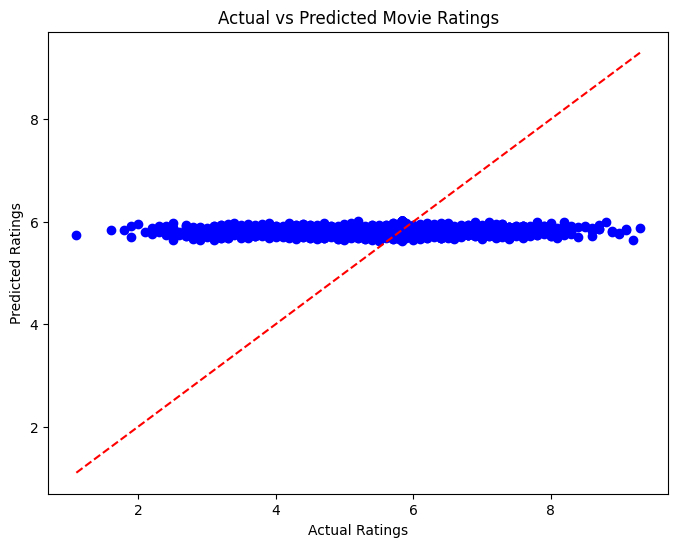

Feature Importance:
    Feature  Importance
0     Genre    0.000439
1  Director   -0.000005
2   Actor 1    0.000010
3   Actor 2    0.000016
4   Actor 3    0.000013


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
#
data_path = '/content/IMDb_Movies_India.csv'  # Replace with your dataset path
movie_data = pd.read_csv(data_path, encoding='latin1')
print("First few rows of the dataset:")
print(movie_data.head())
print("Basic Information:")
print(movie_data.info())
movie_data['Genre'] = movie_data['Genre'].fillna('Unknown')
movie_data['Director'] = movie_data['Director'].fillna('Unknown')
movie_data['Actor 1'] = movie_data['Actor 1'].fillna('Unknown')
movie_data['Actor 2'] = movie_data['Actor 2'].fillna('Unknown')
movie_data['Actor 3'] = movie_data['Actor 3'].fillna('Unknown')
movie_data['Rating'] = movie_data['Rating'].fillna(movie_data['Rating'].mean())
encoder = LabelEncoder()
movie_data['Genre'] = encoder.fit_transform(movie_data['Genre'])
movie_data['Director'] = encoder.fit_transform(movie_data['Director'])
movie_data['Actor 1'] = encoder.fit_transform(movie_data['Actor 1'])
movie_data['Actor 2'] = encoder.fit_transform(movie_data['Actor 2'])
movie_data['Actor 3'] = encoder.fit_transform(movie_data['Actor 3'])

features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

X = movie_data[features]
y = movie_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # line of perfect fit
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Movie Ratings')
plt.show()

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.coef_
})


print("Feature Importance:")
print(feature_importance)